### 爬虫-Task1-网页基础知识

#### 1.互联网
* 互联网也叫因特网(Internet)，是指网络与网络所串联成的庞大网络，这些网络以一组标准的网络协议族相连，连接全世界几十亿个设备，形成逻辑上的单一巨大国际网络。互联网基于网络建立的庞大网络，万维网是互联网服务的一部分。
* HTTP是用户端与服务端的请求与应答标准，TCP/IP协议是一种常用的信息传输协议
* 爬虫的目标是网页

#### 2.网页基础
* 我们的数据来源是网页，那么我们在真正抓取数据之前，有必要先了解一下一个网页的组成。
* 网页是由 HTML 、 CSS 、JavaScript 组成的。
* HTML 是用来搭建整个网页的骨架，而 CSS 是为了让整个页面更好看，包括我们看到的颜色，每个模块的大小、位置等都是由 CSS 来控制的， JavaScript 是用来让整个网页“动起来”，这个动起来有两层意思，一层是网页的数据动态交互，还有一层是真正的动，比如我们都见过一些网页上的动画，一般都是由 JavaScript 配合 CSS 来完成的。
* 我们来手写一个简单 HTML 页面来感受下。 首先创建一个文本文件，将后缀名改为 .html ，比如demo.html，写入如下内容：

```python
<!DOCTYPE  html>
<html>
    <head>
        <meta charset="UTF-8">
        <title>Demo</title>
    </head>
    <body>
        <div id="container">
            <div class="wrapper">
                <h1>Hello World</h1>
                <div>Hello Python.</div>
            </div>
        </div>
    </body>
</html>
```
打开效果为：

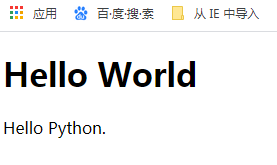

#### 3.爬虫的简单操作

##### 3.1 简单爬取一些网页内容

In [1]:
#导入网页请求库
import urllib
#网址
url = 'https://www.python.org/dev/peps/pep-0020/'
#返res.find():回S中找到子字符串sub的最低索引，这样子包含在S [start：end]中。可选的参数start和end被解释为切片表示法。
res = urllib.request.urlopen(url).read().decode('utf-8')
print(res[res.find('<pre')+28:res.find('</pre>')-1])

Beautiful is better than ugly.
Explicit is better than implicit.
Simple is better than complex.
Complex is better than complicated.
Flat is better than nested.
Sparse is better than dense.
Readability counts.
Special cases aren't special enough to break the rules.
Although practicality beats purity.
Errors should never pass silently.
Unless explicitly silenced.
In the face of ambiguity, refuse the temptation to guess.
There should be one-- and preferably only one --obvious way to do it.
Although that way may not be obvious at first unless you're Dutch.
Now is better than never.
Although never is often better than *right* now.
If the implementation is hard to explain, it's a bad idea.
If the implementation is easy to explain, it may be a good idea.
Namespaces are one honking great idea -- let's do more of those!


##### 3.2 利用金山翻译爬取到的内容，并保存返回内容

In [4]:
#利用post进行翻译
import requests
def translate(word):
    url="http://fy.iciba.com/ajax.php?a=fy"

    data={
        'f': 'auto',
        't': 'auto',
        'w': word,
    }
    
    headers={
        'user-agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/74.0.3729.169 Safari/537.36',
    }#User-Agent会告诉网站服务器，访问者是通过什么工具来请求的，如果是爬虫请求，一般会拒绝，如果是用户浏览器，就会应答。
    response = requests.post(url,data=data,headers=headers)     #发起请求
    json_data=response.json()   #获取json数据
    #print(json_data)
    return json_data
#将翻译内容输出   
def run(word):    
    result = translate(word)['content']['out']   
    print(result)
    return result

def main():
    with open('E:/Machine Learning/PaChong/1.txt') as f:
        zh = [run(word) for word in f]

    with open('E:/Machine Learning/PaChong/zon_of_python_zh-CN.txt', 'w') as g:
        for i in zh:
            g.write(i + '\n')
            
if __name__ == '__main__':
    main()

 美丽胜过丑陋。
 外显优于内隐..
 简单胜于复杂。
 复杂胜于复杂。
 平比嵌套好..
 疏而不密..
 可读性计数。
 特殊情况不足以打破规则。
 尽管实用性胜过纯度。
 错误永远不应该悄悄地过去。
 除非有明确的沉默。
 面对暧昧，拒绝猜测的诱惑..
 应该有一种----最好只有一种----明显的办法来做到这一点。
 虽然这种方式一开始可能不明显，除非你是荷兰人。
 现在总比永远好。
 虽然从来没有比现在更好。
 如果实施很难解释，那是个坏主意。
 如果实现很容易解释，这可能是个好主意。
 命名空间是一个伟大的想法-让我们做更多的这些！


##### 3.3 爬取豆瓣电影信息

In [6]:
import requests
from lxml import etree
import pandas as pd
import os

MOVIES = []
IMGURLS = []

def get_html(url):

    headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/71.0.3578.98 Safari/537.36'}

    try:
        html = requests.get(url,headers = headers)
        html.encoding = html.apparent_encoding
        if html.status_code == 200:
            print('成功获取源代码')
            # print(html.text)
    except Exception as e:
        print('获取源代码失败:%s' % e)

    return html.text

def parse_html(html):

    movies = []
    imgurls = []
    html = etree.HTML(html)
    lis = html.xpath("//ol[@class = 'grid_view']/li")

    for li in lis:
        name = li.xpath(".//a/span[@class='title'][1]/text()")[0]
        director_actor = "".join(li.xpath(".//div[@class='bd']/p/text()[1]")[0].replace(' ','').replace('\n','').replace('/','').split())
        info = "".join(li.xpath(".//div[@class='bd']/p/text()[2]")[0].replace(' ','').replace('\n','').split())
        rating_score = li.xpath(".//span[@class='rating_num']/text()")[0]
        rating_num = li.xpath(".//div[@class='star']/span[4]/text()")[0]
        introduce = li.xpath(".//p[@class='quote']/span/text()")

        if introduce:
            movie = {'name': name, 'director_actor': director_actor, 'info': info, 'rating_score': rating_score,
                     'rating_num': rating_num, 'introduce': introduce[0]}
        else:
            movie = {'name': name, 'director_actor': director_actor, 'info': info, 'rating_score': rating_score,
                     'rating_num': rating_num, 'introduce': None}
        imgurl = li.xpath(".//img/@src")[0]

        movies.append(movie)
        imgurls.append(imgurl)
    return movies,imgurls

def download_img(url,movie):

    if 'movieposter' in os.listdir('E:/Machine Learning/PaChong/豆瓣电影'):
        pass
    else:
        os.mkdir('E:/Machine Learning/PaChong/豆瓣电影/movieposter')
    os.chdir('E:/Machine Learning/PaChong/豆瓣电影/movieposter')

    img = requests.get(url).content

    with open(movie['name'] + '.jpg','wb') as f:
        print('正在下载 ： %s' % url)
        f.write(img)



if __name__ == '__main__':

    for i in range(10):
        url = 'https://movie.douban.com/top250?start=' + str(i * 25) + '&filter='

        html = get_html(url)
        movies = parse_html(html)[0]
        imgurls = parse_html(html)[1]

        MOVIES.extend(movies)
        IMGURLS.extend(imgurls)

    for i in range(250):
        download_img(IMGURLS[i],MOVIES[i])

    os.chdir('E:/Machine Learning/PaChong')
    moviedata = pd.DataFrame(MOVIES)
    moviedata[:]
    moviedata.to_csv('E:/Machine Learning/PaChong/movie.csv')
    print('电影信息成功保存到本地')


成功获取源代码
成功获取源代码
成功获取源代码
成功获取源代码
成功获取源代码
成功获取源代码
成功获取源代码
成功获取源代码
成功获取源代码
成功获取源代码
正在下载 ： https://img3.doubanio.com/view/photo/s_ratio_poster/public/p480747492.jpg
正在下载 ： https://img3.doubanio.com/view/photo/s_ratio_poster/public/p2561716440.jpg
正在下载 ： https://img9.doubanio.com/view/photo/s_ratio_poster/public/p1484728154.jpg
正在下载 ： https://img3.doubanio.com/view/photo/s_ratio_poster/public/p511118051.jpg
正在下载 ： https://img3.doubanio.com/view/photo/s_ratio_poster/public/p2578474613.jpg
正在下载 ： https://img9.doubanio.com/view/photo/s_ratio_poster/public/p457760035.jpg
正在下载 ： https://img1.doubanio.com/view/photo/s_ratio_poster/public/p2557573348.jpg
正在下载 ： https://img3.doubanio.com/view/photo/s_ratio_poster/public/p492406163.jpg
正在下载 ： https://img9.doubanio.com/view/photo/s_ratio_poster/public/p513344864.jpg
正在下载 ： https://img9.doubanio.com/view/photo/s_ratio_poster/public/p524964016.jpg
正在下载 ： https://img9.doubanio.com/view/photo/s_ratio_poster/public/p2574551676.jpg
正在下载 ： https://img3.doub

正在下载 ： https://img3.doubanio.com/view/photo/s_ratio_poster/public/p2505525050.jpg
正在下载 ： https://img3.doubanio.com/view/photo/s_ratio_poster/public/p917846733.jpg
正在下载 ： https://img9.doubanio.com/view/photo/s_ratio_poster/public/p2564685215.jpg
正在下载 ： https://img1.doubanio.com/view/photo/s_ratio_poster/public/p594972928.jpg
正在下载 ： https://img3.doubanio.com/view/photo/s_ratio_poster/public/p792381411.jpg
正在下载 ： https://img9.doubanio.com/view/photo/s_ratio_poster/public/p2220184425.jpg
正在下载 ： https://img3.doubanio.com/view/photo/s_ratio_poster/public/p2564498893.jpg
正在下载 ： https://img9.doubanio.com/view/photo/s_ratio_poster/public/p1816276065.jpg
正在下载 ： https://img9.doubanio.com/view/photo/s_ratio_poster/public/p2221768894.jpg
正在下载 ： https://img3.doubanio.com/view/photo/s_ratio_poster/public/p456825720.jpg
正在下载 ： https://img9.doubanio.com/view/photo/s_ratio_poster/public/p2555762374.jpg
正在下载 ： https://img3.doubanio.com/view/photo/s_ratio_poster/public/p2258078370.jpg
正在下载 ： https://img9.

正在下载 ： https://img9.doubanio.com/view/photo/s_ratio_poster/public/p1910909085.jpg
正在下载 ： https://img9.doubanio.com/view/photo/s_ratio_poster/public/p2530599636.jpg
正在下载 ： https://img1.doubanio.com/view/photo/s_ratio_poster/public/p2351134499.jpg
正在下载 ： https://img1.doubanio.com/view/photo/s_ratio_poster/public/p1023654037.jpg
正在下载 ： https://img1.doubanio.com/view/photo/s_ratio_poster/public/p767451487.jpg
正在下载 ： https://img9.doubanio.com/view/photo/s_ratio_poster/public/p2079334286.jpg
正在下载 ： https://img3.doubanio.com/view/photo/s_ratio_poster/public/p2414771522.jpg
正在下载 ： https://img3.doubanio.com/view/photo/s_ratio_poster/public/p767586451.jpg
正在下载 ： https://img9.doubanio.com/view/photo/s_ratio_poster/public/p2560717825.jpg
正在下载 ： https://img9.doubanio.com/view/photo/s_ratio_poster/public/p848381236.jpg
正在下载 ： https://img9.doubanio.com/view/photo/s_ratio_poster/public/p2522331945.jpg
正在下载 ： https://img1.doubanio.com/view/photo/s_ratio_poster/public/p2575043939.jpg
正在下载 ： https://img1

下载好的电影海报

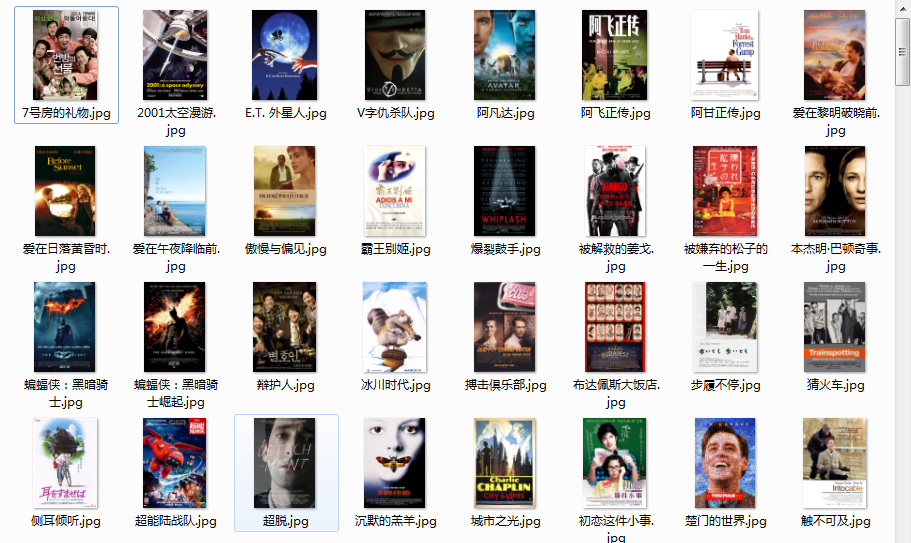

及电影简介

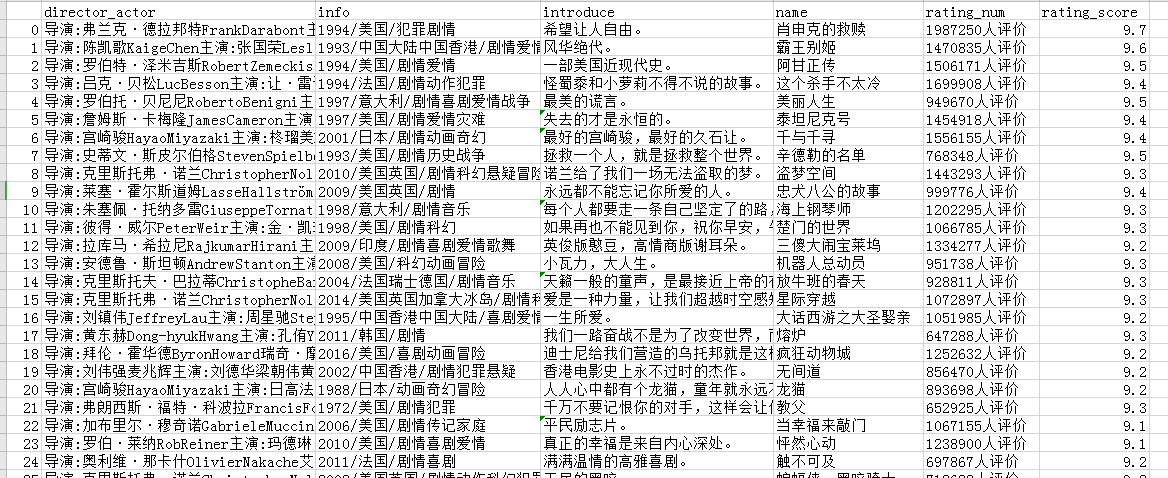

#### 3.4 接入百度地图API进行信息爬取

In [7]:

import requests

def getUrl(*address):
    ak = 'jjNvQ1tNqWrS26Cg9AdTS4Azh0lNxoOx'  ## 填入你的api key
    if len(address) < 1:
        return None
    else:
        for add in address:   
            url = 'http://api.map.baidu.com/geocoding/v3/?address={0}&output=json&ak={1}'.format(add,ak)  
            yield url
            

def getPosition(url):
    '''返回经纬度信息'''
    res = requests.get(url)
    #print(res.text)
    json_data = eval(res.text)
    
    if json_data['status'] == 0:
        lat = json_data['result']['location']['lat'] #纬度
        lng = json_data['result']['location']['lng'] #经度
    else:
        print("Error output!")
        return json_data['status']
    return lat,lng

if __name__ == "__main__":
    address = ['北京市清华大学','北京市北京大学','保定市华北电力大学','上海市复旦大学','武汉市武汉大学']
    for add in address:
        add_url = list(getUrl(add))[0]
        print('url:', add_url)
        try:
            lat,lng = getPosition(add_url)
            print("{0}|经度:{1}|纬度:{2}.".format(add,lng,lat))
        except Error as e:
            print(e)

url: http://api.map.baidu.com/geocoding/v3/?address=北京市清华大学&output=json&ak=jjNvQ1tNqWrS26Cg9AdTS4Azh0lNxoOx
北京市清华大学|经度:116.33337396094367|纬度:40.009645090734296.
url: http://api.map.baidu.com/geocoding/v3/?address=北京市北京大学&output=json&ak=jjNvQ1tNqWrS26Cg9AdTS4Azh0lNxoOx
北京市北京大学|经度:116.31683256328296|纬度:39.99887680537622.
url: http://api.map.baidu.com/geocoding/v3/?address=保定市华北电力大学&output=json&ak=jjNvQ1tNqWrS26Cg9AdTS4Azh0lNxoOx
保定市华北电力大学|经度:115.52130317483764|纬度:38.89477430426888.
url: http://api.map.baidu.com/geocoding/v3/?address=上海市复旦大学&output=json&ak=jjNvQ1tNqWrS26Cg9AdTS4Azh0lNxoOx
上海市复旦大学|经度:121.74295536914276|纬度:31.06665792321301.
url: http://api.map.baidu.com/geocoding/v3/?address=武汉市武汉大学&output=json&ak=jjNvQ1tNqWrS26Cg9AdTS4Azh0lNxoOx
武汉市武汉大学|经度:114.37292090919235|纬度:30.543803317143624.
